# Pratishtha Singh- 8927578830

### 1. (b)

I have first cleaned all the excel files by removing the first 5 lines and the #'s

In [224]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LogisticRegressionCV
path= 'C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM'
files = []
os.listdir(path)
for dir1 in os.listdir(path):
    for file in os.listdir(path + '/' + dir1):
        if file.endswith('.csv'):
            files.append(path + '/' + dir1 + '/' + file)
          
train_data_names=[]
test_data_names=[]

for name in files:
    if not(name.startswith(path + '/'+ 'bending1') or name.startswith(path + '/'+ 'bending2')):
        if(name.endswith('dataset1.csv') or name.endswith('dataset2.csv') or name.endswith('dataset3.csv')):
            test_data_names.append(name)
        else:
            train_data_names.append(name)
    else:
        if(name.endswith('dataset1.csv') or name.endswith('dataset2.csv')):
            test_data_names.append(name)
        else:
            train_data_names.append(name)
test_data = []
train_data = []
df_test= []
df_train= []
for name in test_data_names:
    df=pd.read_csv(name)
    df_test.append(df)
test_data=pd.concat(df_test)
test_data.to_csv('test.csv',index=False)
print(test_data)


     Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      39.25       0.43      22.75       0.43      33.75   
1              250      39.25       0.43      23.00       0.00      33.00   
2              500      39.25       0.43      23.25       0.43      33.00   
3              750      39.50       0.50      23.00       0.71      33.00   
4             1000      39.50       0.50      24.00       0.00      33.00   
5             1250      39.25       0.43      24.00       0.00      33.00   
6             1500      39.25       0.43      24.00       0.00      33.00   
7             1750      39.00       0.00      23.75       0.43      33.00   
8             2000      39.50       0.50      24.00       0.00      33.00   
9             2250      39.50       0.50      23.00       0.00      33.00   
10            2500      39.50       0.50      23.25       0.43      33.00   
11            2750      39.50       0.50      23.50       0.50      32.75   

In [225]:
for name in train_data_names:
    df=pd.read_csv(name)
    df_train.append(df)
train_data=pd.concat(df_train)
train_data.to_csv('train.csv',index=False)
print(train_data)

     Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      42.00       0.71      21.25       0.43      30.00   
1              250      41.50       0.50      20.25       1.48      31.25   
2              500      41.50       0.50      14.25       1.92      33.00   
3              750      40.75       0.83      15.75       0.43      33.00   
4             1000      40.00       0.71      20.00       2.74      32.75   
5             1250      41.25       0.83      24.25       0.43      31.50   
6             1500      42.25       0.43      23.75       0.43      35.25   
7             1750      43.50       0.87      21.00       0.00      36.00   
8             2000      42.75       0.83      21.25       0.43      36.00   
9             2250      43.25       0.43      23.75       0.43      36.00   
10            2500      43.25       0.83      24.50       0.50      36.00   
11            2750      43.75       0.43      24.25       0.43      36.00   

I have appened all the testing and training values in df_test and df_test respectively. Then I have created a new .csv file for them(test.csv and train.csv) inside the Notebook. 

reference from https://stackoverflow.com/questions/53189427/how-to-open-multiple-csv-files-from-a-folder-in-python

### (c) Feature Extraction (i)

Common Time Domain Features used in Time Series Classification:
    1. Maximum
    2. Minimum
    3. Mean
    4. Median
    5. Variance
    6. Standard Deviation
    7. Number Peaks
    8. Skewness
    9. Kurtosis
    10. First quartile
    11. Third Quartile
    12. Inter-Quartile Range

### (c) Feature Extraction (ii)

In [226]:
list1=[]
l1=[]
cols_i=[]
files = []

col=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
cols=['Minimum','Maximum','Mean','Median','Standrd Deviation','First Quartile','Third Quartile']
for feature in range(1,7):
    for x in range(len(cols)):
        cols_i.append((cols[x]+str(feature)))
for dir1 in os.listdir(path):
    for file in os.listdir(path + '/' + dir1):
        if file.endswith('.csv'):
            files.append(path + '/' + dir1 + '/' + file)

for f in files:
    df=pd.read_csv(f,usecols=col)
    for c in col:
        list1.append(df[c].min())
        list1.append(df[c].max())
        list1.append(df[c].mean())
        list1.append(df[c].median())
        list1.append(df[c].std())
        list1.append(df[c].quantile(0.25))
        list1.append(df[c].quantile(0.75))
    l1.append(list1)
    list1 = [] #initialize list1 again because the size will keep incresing with the old list1 and new list1 values


In [227]:
df1=pd.DataFrame(l1,columns =cols_i)
df1

,Minimum1,Maximum1,Mean1,Median1,Standrd Deviation1,First Quartile1,Third Quartile1,Minimum2,Maximum2,Mean2,...,Standrd Deviation5,First Quartile5,Third Quartile5,Minimum6,Maximum6,Mean6,Median6,Standrd Deviation6,First Quartile6,Third Quartile6
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.00,1.92,0.570583,0.430,0.582915,0.0000,1.3000
1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.5000,0.00,3.11,0.571083,0.430,0.601010,0.0000,1.3000
2,35.00,47.40,43.954500,44.330,1.558835,43.0000,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.00,1.79,0.493292,0.430,0.513506,0.0000,0.9400
3,33.00,47.75,42.179813,43.500,3.670666,39.1500,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000
4,33.00,45.75,41.678063,41.750,2.243490,41.3300,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000
5,37.00,48.00,43.454958,43.250,1.386098,42.5000,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700
6,36.25,48.00,43.969125,44.500,1.618364,43.3100,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300
7,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,3.693786,20.5000,27.0000,0.00,4.97,0.700188,0.500,0.693720,0.4300,0.8700
8,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,5.053642,15.0000,20.7500,0.00,6.76,1.122125,0.830,1.012342,0.4700,1.3000
9,21.00,50.00,32.586208,33.000,6.238143,26.1875,34.5000,0.0,9.90,0.516125,...,5.032424,17.6700,23.5000,0.00,13.61,1.162042,0.830,1.332980,0.4700,1.3000


### (c) Feature Extraction (iii)

In [228]:
standard_deviation=df1.std()
standard_deviation

Minimum1              9.569975
Maximum1              4.394362
Mean1                 5.335718
Median1               5.440054
Standrd Deviation1    1.772153
First Quartile1       6.153590
Third Quartile1       5.138925
Minimum2              0.000000
Maximum2              5.062729
Mean2                 1.574164
Median2               1.412244
Standrd Deviation2    0.884105
First Quartile2       0.946386
Third Quartile2       2.125266
Minimum3              2.956462
Maximum3              4.875137
Mean3                 4.008380
Median3               4.036396
Standrd Deviation3    0.946710
First Quartile3       4.220658
Third Quartile3       4.171628
Minimum4              0.000000
Maximum4              2.183625
Mean4                 1.166114
Median4               1.145586
Standrd Deviation4    0.458242
First Quartile4       0.843620
Third Quartile4       1.552504
Minimum5              6.124001
Maximum5              5.741238
Mean5                 5.675593
Median5               5.813782
Standrd 

In [229]:
from sklearn.utils import resample
list2=[]
lower=[]
upper=[]
print("90% Bootstrap Class Interval for the Standard Deviation of each Feature:")
for i in df1.columns:
    for j in range(1,1001):
        bootstrap_resample=resample(df1[i],n_samples= len(df1[i])) 
        list2.append(bootstrap_resample.std())
    sorted(list2)
    lower=np.percentile(list2,5)
    upper=np.percentile(list2,95)
    print(i,lower,upper)
    print('\n')
    lower = []
    upper = []
    list2 = []

90% Bootstrap Class Interval for the Standard Deviation of each Feature:
Minimum1 8.303839973031836 10.76564142483668


Maximum1 3.252185202030841 5.244232126303388


Mean1 4.7247437926804965 5.8877372462927005


Median1 4.755437058448049 5.978280810219533


Standrd Deviation1 1.5660932622327894 1.9458277640447763


First Quartile1 5.596766032512206 6.639422455271122


Third Quartile1 4.38142794532101 5.819105134447403


Minimum2 0.0 0.0


Maximum2 4.641613482095706 5.378442819939569


Mean2 1.4053359257588909 1.7065330039966937


Median2 1.2346266778200101 1.5485725617709134


Standrd Deviation2 0.8063643818780105 0.9392608264874073


First Quartile2 0.8303270842883586 1.0377232950773025


Third Quartile2 1.893415666950037 2.29253574985305


Minimum3 2.767394999869349 3.121857957344424


Maximum3 4.164439854573385 5.503391819146495


Mean3 3.4496778483829393 4.495314387586385


Median3 3.4785902554117896 4.5500989493324955


Standrd Deviation3 0.7546914203934447 1.1222256526250391


F

resample reference from https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/


np.percentile reference from https://www.youtube.com/watch?reload=9&v=Qx09zGdGHiw

### (c) Feature Extraction (iv)

The three most important time domain features are:
    1. Mean - for getting the average values
    2. Median - for getting the middle values
    3. Standard Deviation - for estimating the extent of deviation

### (d) Binary Classification Using Logistic Regression (i)

In [230]:
files=[]
cols_j=[]
list2=[]
l2=[]
bend_fil=["bending1","bending2"]
col=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
cols=['Minimum','Maximum','Mean','Median','Standrd Deviation','First Quartile','Third Quartile']
for feature in range(1,7):
    for x in range(len(cols)):
        cols_j.append((cols[x]+str(feature)))
for b in bend_fil:
    path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/train'.format(b)
    for dir1 in os.listdir(path):
        files.append(path + '/' + dir1)
for f in files:
    df=pd.read_csv(f,usecols=col)
    for c in col:
        list2.append(df[c].min())
        list2.append(df[c].max())
        list2.append(df[c].mean())
        list2.append(df[c].median())
        list2.append(df[c].std())
        list2.append(df[c].quantile(0.25))
        list2.append(df[c].quantile(0.75))
    l2.append(list2)
    list2 = []  

In [231]:
df1=pd.DataFrame(l2,columns=cols_j)
one=[]
for o in range(1,10):
    one.append(1)
df1["Action"]=one
df1

,Minimum1,Maximum1,Mean1,Median1,Standrd Deviation1,First Quartile1,Third Quartile1,Minimum2,Maximum2,Mean2,...,First Quartile5,Third Quartile5,Minimum6,Maximum6,Mean6,Median6,Standrd Deviation6,First Quartile6,Third Quartile6,Action
0,35.00,47.40,43.954500,44.33,1.558835,43.0000,45.0000,0.0,1.70,0.426250,...,35.3625,36.5000,0.0,1.79,0.493292,0.43,0.513506,0.00,0.94,1
1,33.00,47.75,42.179813,43.50,3.670666,39.1500,45.0000,0.0,3.00,0.696042,...,30.4575,36.3300,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00,1
2,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.7500,0.0,2.83,0.535979,...,28.4575,31.2500,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50,1
3,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.0000,0.0,1.58,0.378083,...,22.2500,24.0000,0.0,5.26,0.679646,0.50,0.622534,0.43,0.87,1
4,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.6700,0.0,1.50,0.413125,...,20.5000,23.7500,0.0,2.96,0.555313,0.49,0.487826,0.00,0.83,1
5,21.00,50.00,32.586208,33.00,6.238143,26.1875,34.5000,0.0,9.90,0.516125,...,17.6700,23.5000,0.0,13.61,1.162042,0.83,1.332980,0.47,1.30,1
6,27.50,33.00,29.881938,30.00,1.153837,29.0000,30.2700,0.0,1.00,0.256438,...,17.0000,19.0000,0.0,6.40,0.701625,0.71,0.481103,0.47,0.94,1
7,19.00,45.50,30.938104,29.00,7.684146,26.7500,38.0000,0.0,6.40,0.467167,...,15.0000,20.8125,0.0,6.73,1.107354,0.83,1.080842,0.47,1.30,1
8,25.00,47.50,31.058250,29.71,4.829794,27.5000,31.8125,0.0,6.38,0.405458,...,9.0000,18.3125,0.0,4.92,1.098104,0.94,0.831480,0.50,1.30,1


In [232]:
files=[]
cols_k=[]
list2=[]
l2=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
col=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
cols=['Minimum','Maximum','Mean','Median','Standrd Deviation','First Quartile','Third Quartile']
for feature in range(1,7):
    for x in range(len(cols)):
        cols_k.append((cols[x]+str(feature)))
for b in bend_fil:
    path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/train'.format(b)
    for dir1 in os.listdir(path):
        files.append(path + '/' + dir1)
for f in files:
    df=pd.read_csv(f,usecols=col)
    for c in col:
        list2.append(df[c].min())
        list2.append(df[c].max())
        list2.append(df[c].mean())
        list2.append(df[c].median())
        list2.append(df[c].std())
        list2.append(df[c].quantile(0.25))
        list2.append(df[c].quantile(0.75))
    l2.append(list2)
    list2 = []  

In [233]:
df2=pd.DataFrame(l2,columns=cols_k)
zero=[]
for o in range(1,61):
    zero.append(0)
df2["Action"]=zero
df2

,Minimum1,Maximum1,Mean1,Median1,Standrd Deviation1,First Quartile1,Third Quartile1,Minimum2,Maximum2,Mean2,...,First Quartile5,Third Quartile5,Minimum6,Maximum6,Mean6,Median6,Standrd Deviation6,First Quartile6,Third Quartile6,Action
0,27.00,45.00,36.819521,36.000,3.900459,33.7500,40.2500,0.0,10.47,2.600146,...,15.5000,19.2700,0.00,8.99,2.887562,2.525,1.723094,1.5600,3.7700,0
1,27.00,44.33,36.541667,36.000,4.018922,33.2500,39.8125,0.0,10.43,2.847958,...,15.0000,19.5000,0.00,9.18,3.225458,2.870,1.769758,1.8850,4.2625,0
2,18.50,44.25,35.752354,36.000,4.614802,33.0000,39.3300,0.0,12.60,3.328104,...,14.0000,18.0625,0.00,9.39,3.069667,2.770,1.748326,1.7975,4.0600,0
3,19.00,43.75,35.879875,36.000,4.614878,33.0000,39.5000,0.0,11.20,3.414312,...,14.7500,19.6900,0.00,8.50,3.093021,2.930,1.626034,1.8900,4.0600,0
4,23.33,43.50,36.244083,36.750,3.822016,33.4575,39.2500,0.0,9.71,2.736021,...,15.7500,21.0000,0.00,11.15,3.530500,3.110,1.963685,2.1700,4.6175,0
5,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,17.9500,21.7500,0.00,9.34,2.921729,2.500,1.852600,1.5000,3.9000,0
6,19.00,44.00,36.228396,36.000,3.528617,34.0000,39.0000,0.0,12.28,2.831687,...,14.0000,18.0625,0.00,9.98,3.480687,3.340,1.827769,2.1025,4.5500,0
7,26.50,44.33,36.687292,36.000,3.529404,34.2500,39.3725,0.0,12.89,2.973042,...,14.6700,18.5000,0.00,8.19,3.073312,2.690,1.629675,1.9125,4.0875,0
8,25.33,45.00,37.114312,36.250,3.710385,34.5000,40.2500,0.0,10.84,2.730000,...,14.7500,18.5000,0.00,9.50,3.076354,2.770,1.824534,1.7000,4.0375,0
9,26.75,44.75,36.863375,36.330,3.555787,34.5000,39.7500,0.0,11.68,2.757312,...,15.0000,18.6700,0.00,8.81,2.773312,2.590,1.569919,1.6400,3.6325,0


In [234]:
df3=df1.append(df2)
df4=df3[['Mean1','Mean2','Mean6','Median1','Median2','Median6','Standrd Deviation1','Standrd Deviation2','Standrd Deviation6','Action']]

In [235]:
df4.reset_index()

,index,Mean1,Mean2,Mean6,Median1,Median2,Median6,Standrd Deviation1,Standrd Deviation2,Standrd Deviation6,Action
0,0,43.954500,0.426250,0.493292,44.330,0.470,0.430,1.558835,0.338690,0.513506,1
1,1,42.179813,0.696042,0.613521,43.500,0.500,0.500,3.670666,0.630860,0.524317,1
2,2,41.678063,0.535979,0.383292,41.750,0.500,0.430,2.243490,0.405469,0.389164,1
3,3,43.454958,0.378083,0.679646,43.250,0.470,0.500,1.386098,0.315566,0.622534,1
4,4,43.969125,0.413125,0.555313,44.500,0.470,0.490,1.618364,0.263111,0.487826,1
5,5,32.586208,0.516125,1.162042,33.000,0.430,0.830,6.238143,0.789957,1.332980,1
6,6,29.881938,0.256438,0.701625,30.000,0.000,0.710,1.153837,0.275833,0.481103,1
7,7,30.938104,0.467167,1.107354,29.000,0.430,0.830,7.684146,0.734444,1.080842,1
8,8,31.058250,0.405458,1.098104,29.710,0.430,0.940,4.829794,0.566668,0.831480,1
9,0,36.819521,2.600146,2.887562,36.000,2.120,2.525,3.900459,1.821404,1.723094,0


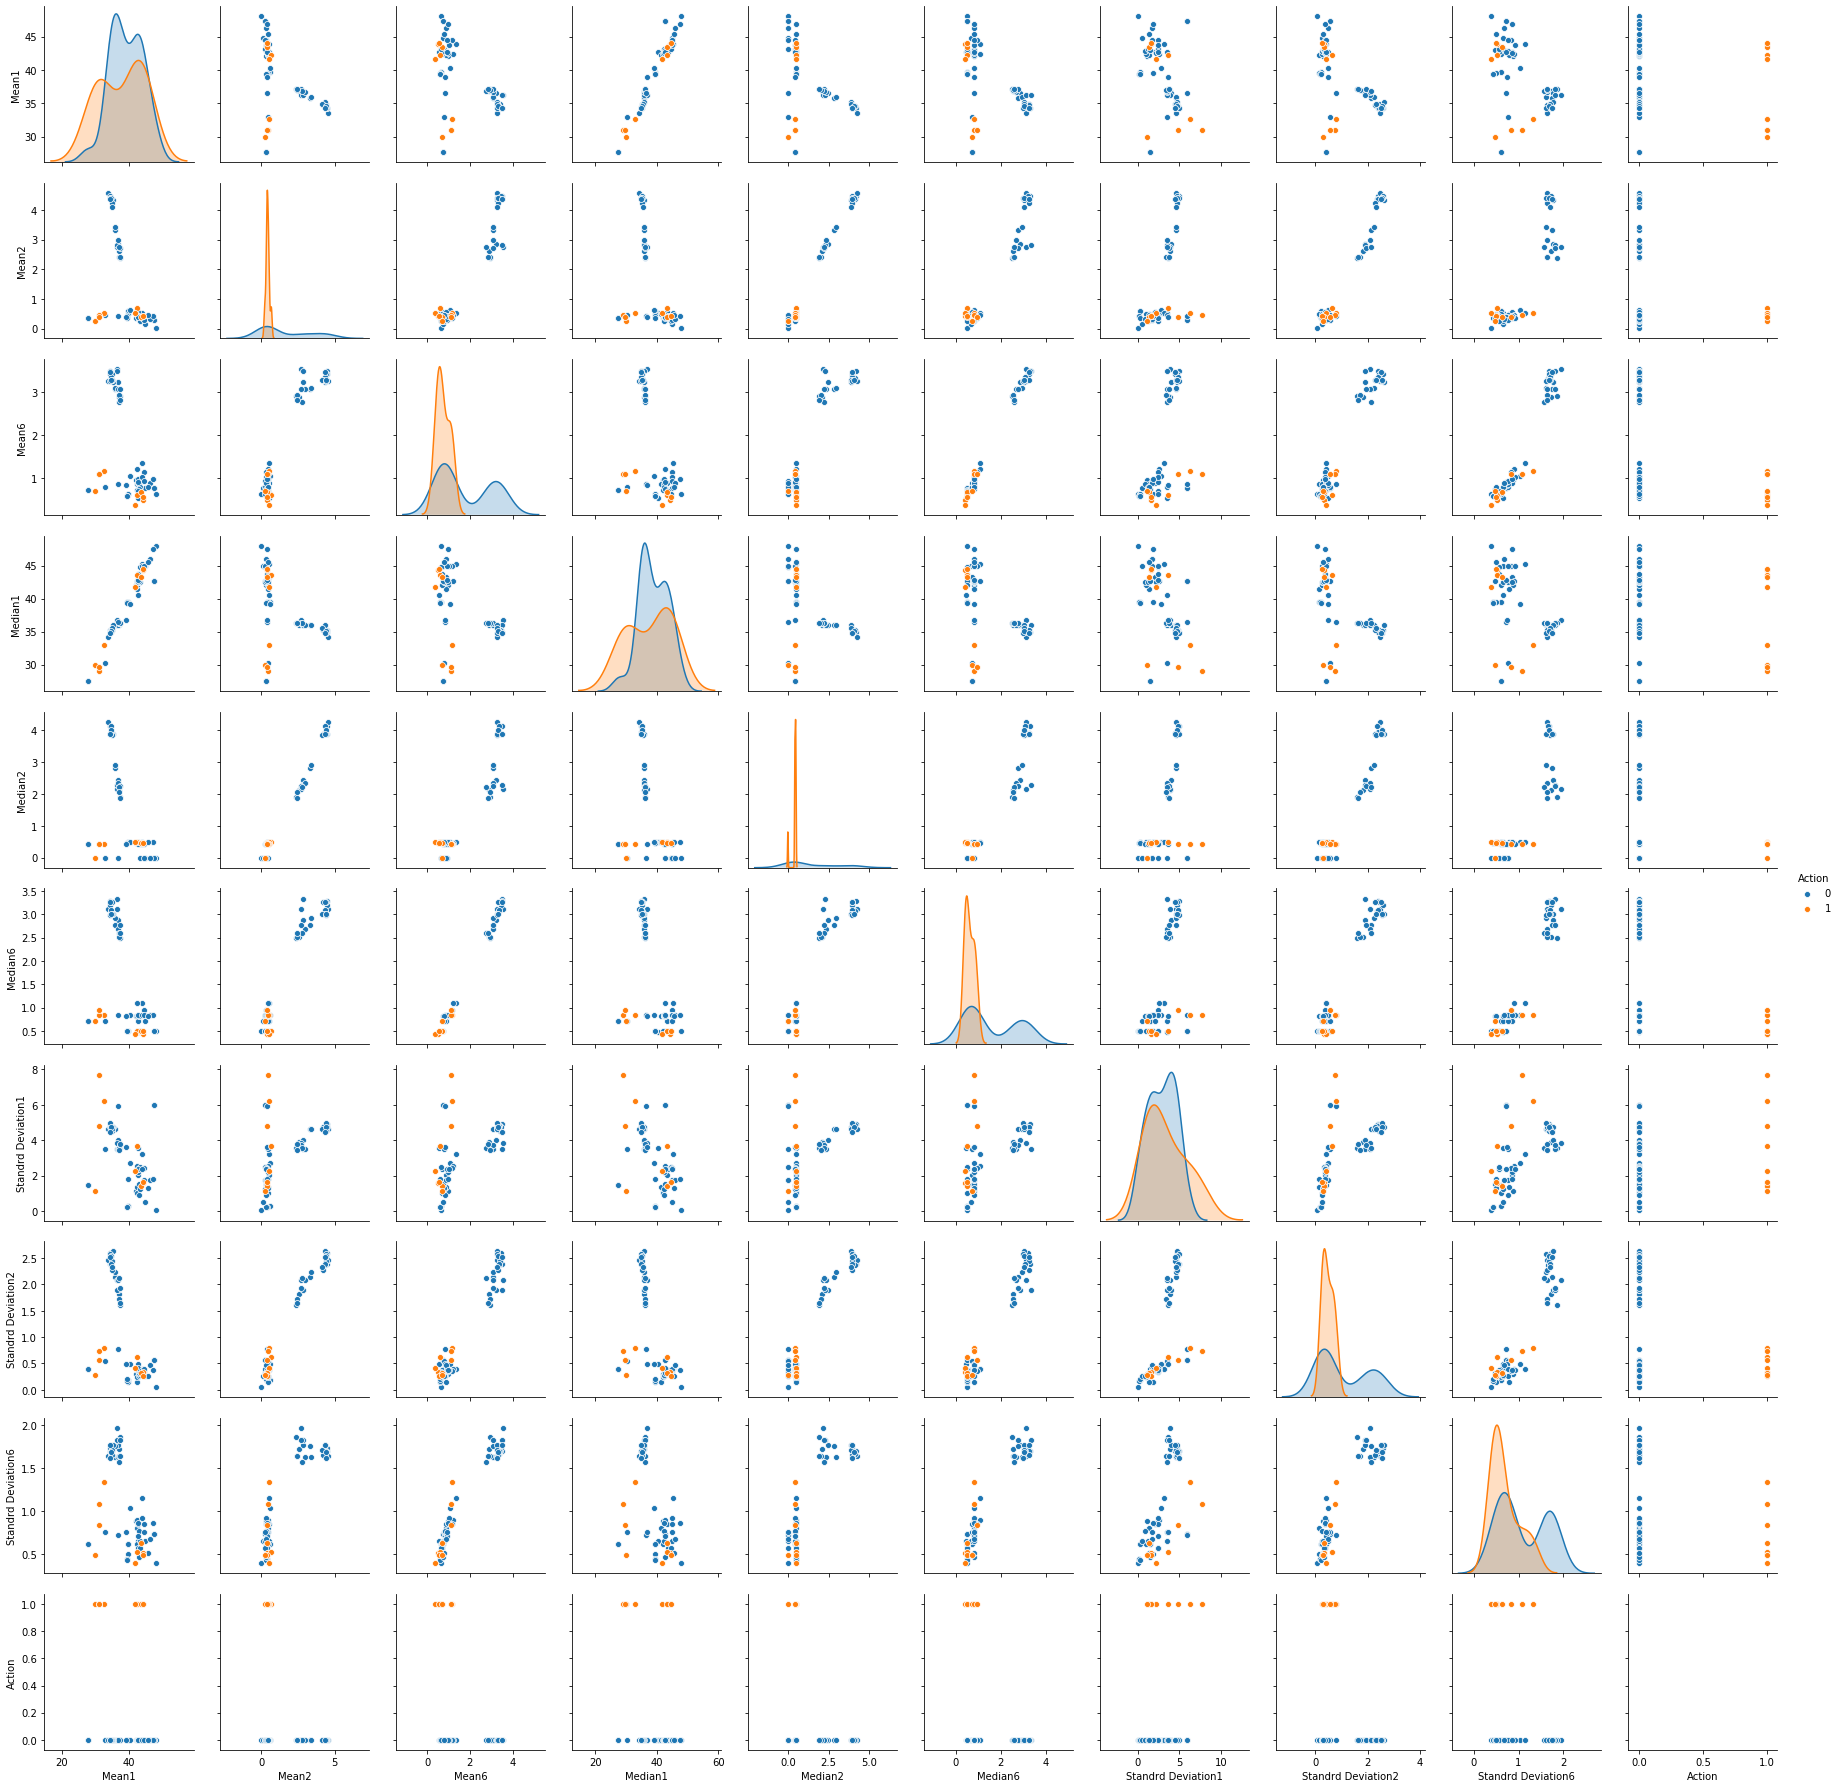

In [236]:
import seaborn as sns
sns.pairplot(df4,hue='Action')

0/Blue is for non-bending data and 

1/Orange is for bending1 and bending2 data

The datapoints for the non-bending data are a lot more than the bending data. There is a marginal imbalance between the data where the bending class is the rare class. 

The plots that show more distinction between the bending and the non-bending data give more information that the plots where it is hard to distinguish between the two. 

We can notice a positive linear relationship between Mean1 & Median1, Mean2 & Median2 and Mean6 & Median6.

###  (d) Binary Classification Using Logistic Regression (ii)

In [237]:
files=[]
cols_l=[]
list2=[]
l2=[]
bend_fil=["bending1","bending2"]
col=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
double_col=["avg_rss12-part1","var_rss12-part1","avg_rss13-part1","var_rss13-part1","avg_rss23-part1","var_rss23-part1","avg_rss12-part2","var_rss12-part2","avg_rss13-part2","var_rss13-part2","avg_rss23-part2","var_rss23-part2"]
cols=['Minimum','Maximum','Mean','Median','Standrd Deviation','First Quartile','Third Quartile']
for feature in range(1,13):
    for x in range(len(cols)):
        cols_l.append((cols[x]+str(feature)))
for b in bend_fil:
    path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/train'.format(b)
    for dir1 in os.listdir(path):
        files.append(path + '/' + dir1)
for f in files:
    df=pd.read_csv(f,usecols=col)
    df1=df.iloc[0:240]
    df2=df.iloc[240:480]
    df1.rename(columns={"avg_rss12": "avg_rss12-part1", "var_rss12": "var_rss12-part1","avg_rss13" : "avg_rss13-part1","var_rss13" : "var_rss13-part1","avg_rss23":"avg_rss23-part1","var_rss23":"var_rss23-part1"},inplace=True)
    df2.rename(columns={"avg_rss12": "avg_rss12-part2", "var_rss12": "var_rss12-part2","avg_rss13" : "avg_rss13-part2","var_rss13" : "var_rss13-part2","avg_rss23":"avg_rss23-part2","var_rss23":"var_rss23-part2"},inplace=True)
    df1.reset_index(drop=True, inplace=True)
    df2.reset_index(drop=True, inplace=True)
    df3=pd.concat([df1, df2.reindex(df1.index)], axis=1)
    for c in double_col:
        list2.append(df3[c].min())
        list2.append(df3[c].max())
        list2.append(df3[c].mean())
        list2.append(df3[c].median())
        list2.append(df3[c].std())
        list2.append(df3[c].quantile(0.25))
        list2.append(df3[c].quantile(0.75))
    l2.append(list2)
    list2 = []  

reset_index reference from https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
reindex() reference from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [238]:
df4=pd.DataFrame(l2,columns=cols_l)
one=[]
for o in range(1,10):
    one.append(1)
df4["Action"]=one
df4

,Minimum1,Maximum1,Mean1,Median1,Standrd Deviation1,First Quartile1,Third Quartile1,Minimum2,Maximum2,Mean2,...,First Quartile11,Third Quartile11,Minimum12,Maximum12,Mean12,Median12,Standrd Deviation12,First Quartile12,Third Quartile12,Action
0,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,0.0,1.50,0.381042,...,33.0000,36.2500,0.0,1.50,0.388333,0.00,0.478528,0.0000,0.71,1
1,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,0.0,3.00,0.673292,...,28.7500,33.7500,0.0,2.18,0.586083,0.47,0.491873,0.0000,0.87,1
2,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,0.0,2.83,0.623083,...,28.3100,30.5625,0.0,1.50,0.347500,0.43,0.363144,0.0000,0.50,1
3,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,0.0,1.30,0.250042,...,22.5000,23.7500,0.0,4.06,0.543875,0.50,0.473445,0.4300,0.71,1
4,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,0.0,1.30,0.378667,...,21.0000,23.5000,0.0,2.96,0.585750,0.50,0.487918,0.4225,0.83,1
5,21.00,50.00,32.014375,26.125,8.743464,24.7300,42.0000,0.0,9.90,0.587875,...,16.9375,20.0000,0.0,6.02,0.786042,0.71,0.768408,0.4700,0.94,1
6,29.00,33.00,30.712417,30.290,0.937965,30.0000,31.5000,0.0,1.00,0.298958,...,17.3300,19.2500,0.0,1.50,0.677917,0.71,0.322210,0.4700,0.94,1
7,19.00,39.25,29.189875,27.000,6.216895,25.9375,36.0000,0.0,4.33,0.497042,...,14.4575,25.0000,0.0,5.61,1.114917,0.87,0.996452,0.4700,1.30,1
8,25.00,47.50,34.110625,30.500,5.097232,30.0000,39.3725,0.0,6.38,0.528500,...,8.3300,13.7500,0.0,4.92,1.199958,1.00,0.838177,0.7100,1.41,1


In [239]:
files=[]
cols_m=[]
list2=[]
l2=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
col=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
double_col=["avg_rss12-part1","var_rss12-part1","avg_rss13-part1","var_rss13-part1","avg_rss23-part1","var_rss23-part1","avg_rss12-part2","var_rss12-part2","avg_rss13-part2","var_rss13-part2","avg_rss23-part2","var_rss23-part2"]
cols=['Minimum','Maximum','Mean','Median','Standrd Deviation','First Quartile','Third Quartile']
for feature in range(1,13):
    for x in range(len(cols)):
        cols_m.append((cols[x]+str(feature)))
for b in bend_fil:
    path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/train'.format(b)
    for dir1 in os.listdir(path):
        files.append(path + '/' + dir1)
for f in files:
    df=pd.read_csv(f,usecols=col)
    df1=df.iloc[0:240]
    df2=df.iloc[240:480]
    df1.rename(columns={"avg_rss12": "avg_rss12-part1", "var_rss12": "var_rss12-part1","avg_rss13" : "avg_rss13-part1","var_rss13" : "var_rss13-part1","avg_rss23":"avg_rss23-part1","var_rss23":"var_rss23-part1"},inplace=True)
    df2.rename(columns={"avg_rss12": "avg_rss12-part2", "var_rss12": "var_rss12-part2","avg_rss13" : "avg_rss13-part2","var_rss13" : "var_rss13-part2","avg_rss23":"avg_rss23-part2","var_rss23":"var_rss23-part2"},inplace=True)
    df1.reset_index(drop=True, inplace=True)
    df2.reset_index(drop=True, inplace=True)
    df3=pd.concat([df1, df2.reindex(df1.index)], axis=1)
    for c in double_col:
        list2.append(df3[c].min())
        list2.append(df3[c].max())
        list2.append(df3[c].mean())
        list2.append(df3[c].median())
        list2.append(df3[c].std())
        list2.append(df3[c].quantile(0.25))
        list2.append(df3[c].quantile(0.75))
    l2.append(list2)
    list2 = []  

In [240]:
df5=pd.DataFrame(l2,columns=cols_m)
zero=[]
for o in range(1,61):
    zero.append(0)
df5["Action"]=zero
df5

,Minimum1,Maximum1,Mean1,Median1,Standrd Deviation1,First Quartile1,Third Quartile1,Minimum2,Maximum2,Mean2,...,First Quartile11,Third Quartile11,Minimum12,Maximum12,Mean12,Median12,Standrd Deviation12,First Quartile12,Third Quartile12,Action
0,29.67,44.00,36.776167,36.000,3.674276,33.7500,40.0000,0.0,10.47,2.743208,...,15.2500,20.0000,0.00,8.99,3.159292,2.860,1.820408,1.8900,4.0825,0
1,27.67,44.33,36.644958,36.000,4.054482,33.1875,40.2700,0.0,9.12,2.826458,...,15.0000,19.0625,0.00,9.18,3.206500,2.680,1.878752,1.7900,4.2225,0
2,20.00,44.25,35.692167,35.500,4.643595,33.0000,39.2500,0.0,11.39,3.324208,...,14.0000,18.2500,0.00,8.81,2.966917,2.590,1.712062,1.8525,3.7400,0
3,19.00,43.75,35.694167,36.000,4.778355,33.1875,39.5625,0.0,11.20,3.658042,...,15.5000,20.5000,0.00,7.89,2.936500,2.740,1.561593,1.7000,3.7000,0
4,27.00,42.67,36.342750,36.750,3.648495,33.6700,39.0000,0.0,9.71,2.691917,...,16.3100,21.0625,0.00,11.15,3.513250,3.080,1.978396,2.1700,4.5000,0
5,24.25,45.00,36.954208,36.000,3.772836,34.2500,40.2500,0.0,8.18,2.392667,...,18.0000,21.6700,0.00,9.34,2.838083,2.450,1.890755,1.3825,3.8325,0
6,26.00,44.00,36.183208,35.750,3.324873,34.0000,38.8125,0.0,9.65,2.753583,...,14.1500,18.6700,0.00,8.61,3.475333,3.340,1.861694,2.0500,4.5075,0
7,28.00,43.33,36.517542,36.000,3.305618,34.2500,39.0000,0.0,10.85,2.874625,...,15.7500,19.0000,0.00,8.19,3.008042,2.680,1.667305,1.8525,3.8150,0
8,27.80,44.67,37.069917,36.250,3.822253,34.5000,40.2700,0.0,10.50,2.792250,...,15.0000,18.8125,0.00,9.50,3.244042,2.905,1.912478,1.7975,4.4250,0
9,26.75,44.50,36.830792,36.330,3.663132,34.6700,39.7500,0.0,11.68,2.838500,...,15.4575,18.6700,0.00,8.44,2.576542,2.520,1.420814,1.5000,3.4150,0


In [241]:
df6=df4.append(df5)
df7=df6[['Mean1','Mean2','Mean12','Median1','Median2','Median12','Standrd Deviation1','Standrd Deviation2','Standrd Deviation12','Action']]
df7.reset_index()

,index,Mean1,Mean2,Mean12,Median1,Median2,Median12,Standrd Deviation1,Standrd Deviation2,Standrd Deviation12,Action
0,0,44.057167,0.381042,0.388333,44.500,0.470,0.000,1.556971,0.329540,0.478528,1
1,1,43.278875,0.673292,0.586083,45.000,0.485,0.470,3.473355,0.634285,0.491873,1
2,2,41.621208,0.623083,0.347500,42.330,0.500,0.430,3.118644,0.489595,0.363144,1
3,3,44.117042,0.250042,0.543875,45.000,0.000,0.500,1.359836,0.314099,0.473445,1
4,4,43.486208,0.378667,0.585750,43.710,0.470,0.500,1.281976,0.284434,0.487918,1
5,5,32.014375,0.587875,0.786042,26.125,0.470,0.710,8.743464,0.936124,0.768408,1
6,6,30.712417,0.298958,0.677917,30.290,0.430,0.710,0.937965,0.299197,0.322210,1
7,7,29.189875,0.497042,1.114917,27.000,0.430,0.870,6.216895,0.731004,0.996452,1
8,8,34.110625,0.528500,1.199958,30.500,0.470,1.000,5.097232,0.712906,0.838177,1
9,0,36.776167,2.743208,3.159292,36.000,2.260,2.860,3.674276,1.861745,1.820408,0


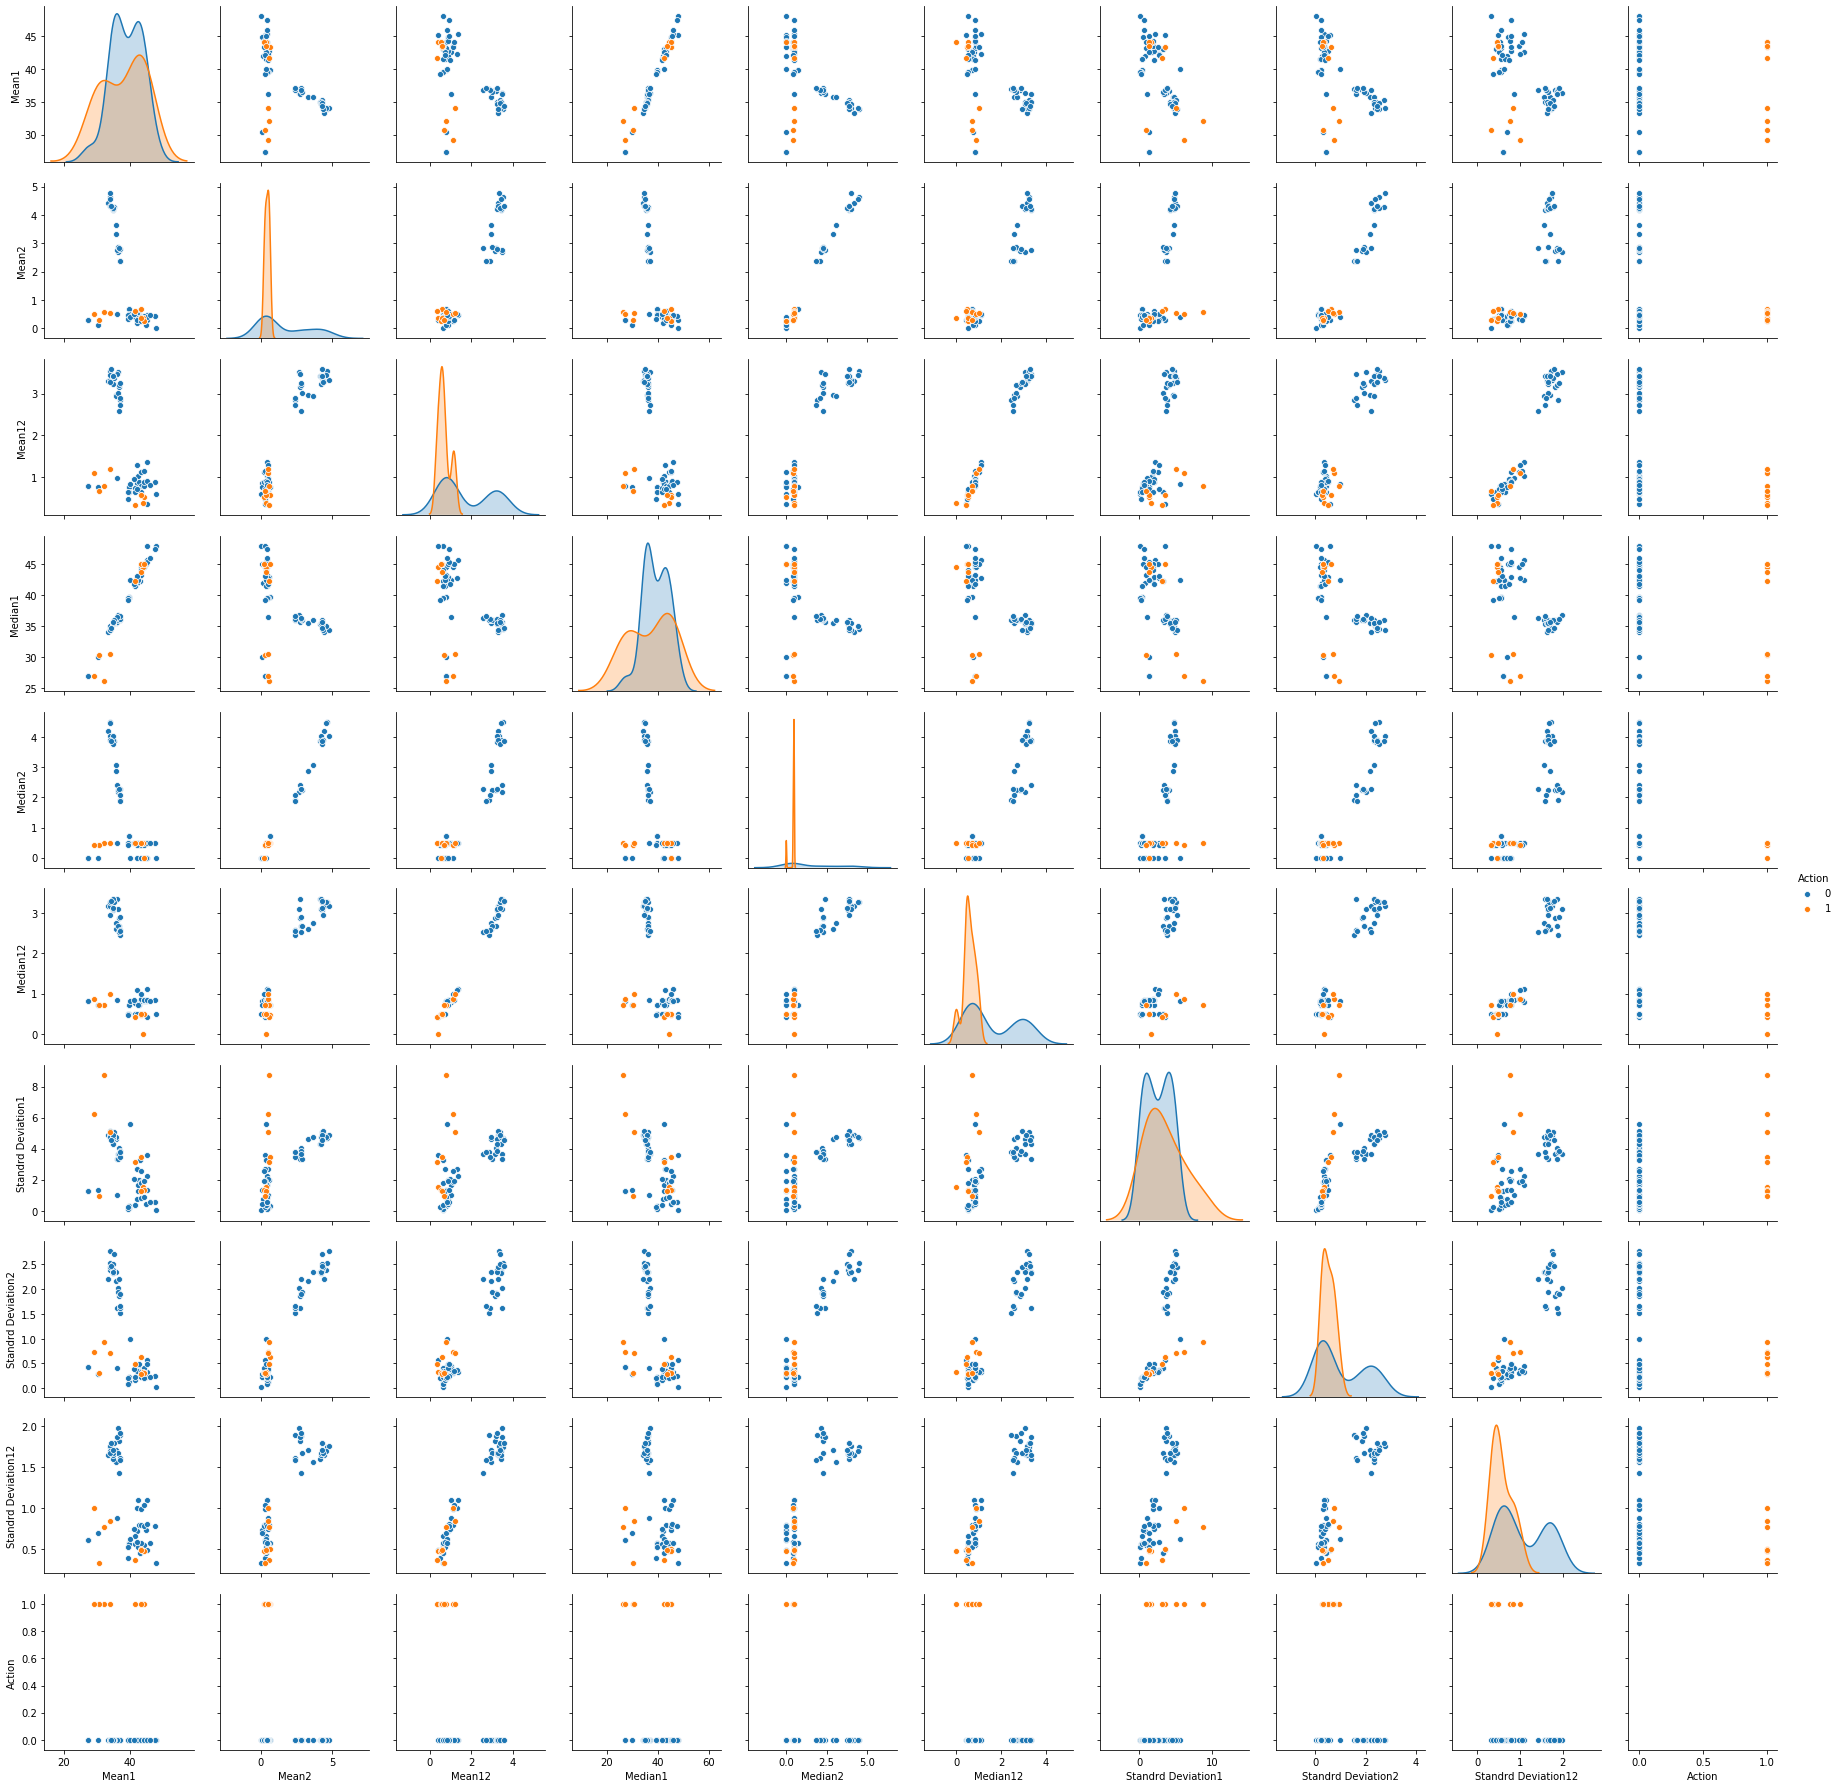

In [242]:
sns.pairplot(df7,hue='Action')

There is not a considerable difference between the previous scatter plots and this one. The orange/bending datapoints are a little more seperated and visible but apart from this there is no significant difference. 

The classes show marginal imbalance in the data where bending class is the rare class.

The plots that show more distinction between the bending and the non-bending data give more information that the plots where it is hard to distinguish between the two. 

There is still a positive linear relationship between Mean1 & Median1, Mean2 & Median2, Mean12 & Median12

### (d) Binary Classification Using Logistic Regression (iii)

In [243]:
def generate_features(bend_fil):
    files=[]
    splits1 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/train'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)


        #len(lth_splits)
        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            #print(len(mean))
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits1.append(features1)
    return splits1
bend_fil=["bending1","bending2"]
splits1 = generate_features(bend_fil)   #features of bending files
# print(splits1)

In [244]:
from sklearn.feature_selection import RFECV

splits0 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits0 = generate_features(bend_fil) #features on non-bending files


In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings(action='ignore')

for g in range(0,20):
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y =np.array([1]*len(splits1[g]) + [0]*len(splits0[g]))
    logmodel = LogisticRegression(C=10**5) # 5-fold stratified cross-validation
    rfe = RFECV(logmodel ,cv=StratifiedKFold(5),scoring='accuracy') #RFECV is ued to select the best set of features
    rfe = rfe.fit(Train_X,Train_Y)
    score=rfe.grid_scores_

    print("Accuracy score of {}=".format(g),score)
    print("Maximum Accuracy of {}=".format(g),np.max(score))
    print("Ranking of {}=".format(g),rfe.ranking_)
    print("Best number of features of {}=".format(g),rfe.n_features_) #In each step the worst number of features are eleminated and n_features_ are left
    print("Prediction results",rfe.predict(Train_X))

Accuracy score of 0= [0.91318681 0.8989011  0.97142857 0.98571429 0.98571429 0.98571429
 0.98571429 0.97142857 0.97142857 0.97142857 0.98571429 0.98571429
 0.98571429 0.98571429 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857]
Maximum Accuracy of 0= 0.9857142857142858
Ranking of 0= [ 9 39 22 38  1 37 35  6 12 23  1  2  5 19 26 17  3 13 36 32  4 16 14 15
 21 24 25 34 31 27 30 33 29 28  1 20  1  7 11 10 18  8]
Best number of features of 0= 4
Prediction results [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy score of 1= [0.8989011  0.88571429 0.94285714 0.98571429 0.97142857 0.97142857
 0.97142857 0.97142857 0.95714286 0.95714286

Accuracy score of 5= [0.92857143 0.92857143 0.92857143 0.92857143 0.94285714 0.95714286
 0.95714286 0.94285714 0.92857143 0.95714286 0.97142857 0.97142857
 0.95714286 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.95714286 0.95714286 0.95714286 0.97142857 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714

Accuracy score of 7= [0.85714286 0.92857143 0.95714286 0.95604396 0.92747253 0.94285714
 0.94285714 0.95714286 0.94285714 0.95714286 0.95714286 0.94175824
 0.95714286 0.95714286 0.95714286 0.92747253 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175

Accuracy score of 9= [0.94285714 0.95714286 0.92857143 0.95714286 0.94285714 0.94285714
 0.94285714 0.97142857 0.94285714 0.95714286 0.95714286 0.94285714
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.97142857 0.97142857 0.97142857
 0.95714286 0.97142857 0.97142857 0.95714286 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.95604396 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396
 0.95604396 0.95604396 0.95604396 0.95604

Accuracy score of 11= [0.95714286 0.95714286 0.95714286 0.97142857 0.97142857 0.98571429
 0.98571429 0.97142857 0.94285714 0.94285714 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.94285714 0.94285714 0.94285714 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.9714

Accuracy score of 13= [0.91428571 0.91428571 0.92857143 0.94285714 0.95714286 0.97142857
 0.97142857 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.94285714
 0.94285714 0.94285714 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.95604396 0.95604396 0.95604396 0.97142857
 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396
 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396
 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396
 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396
 0.95604396 0.95604396 0.95604396 0.9560

Accuracy score of 14= [0.92857143 0.92857143 0.92857143 0.94285714 0.95714286 0.92857143
 0.92857143 0.92857143 0.94285714 0.94285714 0.94285714 0.94285714
 0.92747253 0.92747253 0.94175824 0.95714286 0.94175824 0.95714286
 0.95714286 0.94285714 0.95714286 0.95714286 0.95714286 0.94285714
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.94285714
 0.95714286 0.95714286 0.95714286 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.9714

Accuracy score of 15= [0.95714286 0.91428571 0.95714286 0.95714286 0.95714286 0.95714286
 0.97142857 0.95714286 0.95714286 0.94285714 0.94285714 0.95714286
 0.95714286 0.95604396 0.95604396 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.95714286 0.95714286 0.95714286 0.97142857
 0.95714286 0.95714286 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.95604396
 0.95604396 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.9714

Accuracy score of 16= [0.94285714 0.92857143 0.94285714 0.94285714 0.94285714 0.95714286
 0.95714286 0.95714286 0.97142857 0.97142857 0.94175824 0.94175824
 0.95604396 0.95604396 0.97142857 0.97142857 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.95604396 0.95604396 0.95604396 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.95604396 0.95604396
 0.95604396 0.95604396 0.97142857 0.95604396 0.97142857 0.97142857
 0.97142857 0.95604396 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.95604396 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.95604396 0.95604396 0.9560

Accuracy score of 17= [0.94285714 0.97142857 0.97142857 0.97142857 0.97142857 0.94175824
 0.94175824 0.94175824 0.95714286 0.95604396 0.98571429 0.98571429
 0.98571429 0.98571429 0.98571429 0.97032967 0.97032967 0.97032967
 0.97032967 0.98571429 0.95604396 0.95604396 0.98571429 0.98571429
 0.97032967 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396
 0.95604396 0.95604396 0.95604396 0.97032967 0.95604396 0.97142857
 0.95604396 0.95604396 0.95604396 0.97142857 0.95604396 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.9714

Accuracy score of 18= [0.94175824 0.94175824 0.95714286 0.95714286 0.95714286 0.98571429
 0.98571429 0.98571429 0.97032967 0.95604396 0.95604396 0.97032967
 0.98571429 0.98571429 0.98571429 0.98571429 0.98571429 0.98571429
 0.98571429 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.95714286 0.97142857 0.97142857 0.97142857 0.97142857 0.95714286
 0.95714286 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.95604396 0.95604396 0.95604396
 0.95604396 0.95604396 0.95604396 0.95604396 0.95604396 0.94175824
 0.94175824 0.94175824 0.94175824 0.94175824 0.95604396 0.95604396
 0.95604396 0.95604396 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.95714286
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.9714

Accuracy score of 19= [0.92747253 0.91428571 0.92747253 0.91318681 0.92747253 0.94285714
 0.94175824 0.94175824 0.95714286 0.97142857 0.95604396 0.98571429
 0.98571429 0.95714286 0.94175824 0.95714286 0.97142857 0.97142857
 0.98571429 0.98571429 0.97032967 0.97032967 0.97032967 0.98571429
 0.97142857 0.97142857 0.95714286 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.97142857 0.98571429
 0.98571429 0.98571429 0.98571429 0.97142857 0.95714286 0.97142857
 0.95714286 0.95714286 0.97142857 0.95714286 0.95714286 0.95714286
 0.95714286 0.95714286 0.95714286 0.95714286 0.98571429 0.95714286
 0.95714286 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857 0.97142857
 0.97142857 0.95604396 0.95604396 0.97142857 0.97142857 0.95604396
 0.95604396 0.95604396 0.95604396 0.9560

I have used the stratified cross validation for solving the problem of class imbalance.

The best accuracy score is 1 for the split l=3 (value of g will be 2) and the corresponding value of p (optimal number of features) is 4.

Therefore, the best value of the pair(l,p) is (3,4)

The right way to perform cross valdation in this problem is to first fit and train the data and then select the best features. The wrong way to do cross validation for tis problem is to first find the best features and then train the dataset. 

### (d) Binary Classification Using Logistic Regression (iv)

In [246]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import statsmodels.discrete.discrete_model as sm

for g in range(2,3):
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y =np.array([1]*len(splits1[g]) + [0]*len(splits0[g]))
    logmodel = LogisticRegression(C=10**5) # 5-fold stratified cross-validation
    rfe = RFECV(logmodel ,cv=StratifiedKFold(5),scoring='accuracy')
    rfe = rfe.fit(Train_X,Train_Y)
    score=rfe.grid_scores_
    y_pred=rfe.predict(Train_X)
    
    print("Confusion Matrix=")
    print(confusion_matrix(Train_Y,y_pred))
    m=confusion_matrix(Train_Y, y_pred)
    tn=m[0][0]
    fp=m[0][1]
    fn=m[1][0]
    tp=m[1][1]
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    print("True Positive Rate=",tpr)
    print("False Positive Rate=",fpr)
    
    tp=[]
    for x in range(0,len(rfe.support_)):
        if rfe.support_[x]==True:
            tp.append(x)
#     print(tp)        
    new_Train_X=Train_X[:,[4,35,112,114]]


Confusion Matrix=
[[60  0]
 [ 0  9]]
True Positive Rate= 1.0
False Positive Rate= 0.0


The above result shows the confusion matrix for the best split, i.e. l=3 (g value will be 2).

Here,the values for the confusion matrix are:  True Negative=60,False Positive=0,False Negative=0,True Positive=9

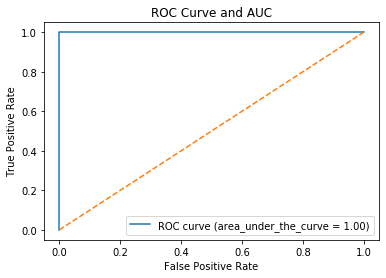

In [247]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Train_Y,y_pred)
area_under_the_curve = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area_under_the_curve = %0.2f)' % area_under_the_curve)
plt.plot([0,1], [0,1], "--")
plt.title("ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

ROC Curve reference from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [248]:
import statsmodels.discrete.discrete_model as sm

log_model_for_table=sm.Logit(Train_Y,new_Train_X).fit(maxiter=7)
print(log_model_for_table.summary())

         Current function value: 0.001240
         Iterations: 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 Oct 2019   Pseudo R-squ.:                  0.9968
Time:                        08:46:30   Log-Likelihood:              -0.085566
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.610e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6827      1.210      0.564      0.572      -1.688       3.053
x2            -0.7783      1.525     -0.510      0.610      -3.767

### (d) Binary Classification Using Logistic Regression (v)

In [249]:
def generate_features(bend_fil):
    files=[]
    splits1 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/test'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)

        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits1.append(features1)
    return splits1
bend_fil=["bending1","bending2"]
splits1 = generate_features(bend_fil)   #features of bending files

In [250]:
splits0 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits0 = generate_features(bend_fil) #features on non-bending files


In [251]:
for g in range(2,3):
    Test_X = np.array(splits1[g] + splits0[g])
    Test_Y =np.array([1]*len(splits1[g]) + [0]*len(splits0[g]))
    new_Test_X=Test_X[:,[4,35,112,114]]
    logmodel = LogisticRegression(C=10**5) # 5-fold stratified cross-validation
    rfe = RFECV(logmodel ,cv=StratifiedKFold(5),scoring='accuracy')
    rfe = rfe.fit(new_Train_X,Train_Y)
    y_pred=rfe.predict(new_Test_X)
    score=rfe.grid_scores_
    print("Predictions on the Test Set=",y_pred)
    print("Prediction Accuracy=",np.max(score))
    print("Confusion Matrix=")
    print(confusion_matrix(Test_Y,y_pred))
   

Predictions on the Test Set= [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediction Accuracy= 1.0
Confusion Matrix=
[[15  0]
 [ 0  4]]


The cross-validation accuracy for the training set was 1 when l=3 and the optimal number of features is 4.

The prediction accuracy on the testing set is 1.0. This indicates that the number of splits and the features we selected work well. 

Here,the values for the confusion matrix are:  True Negative=15,False Positive=0,False Negative=0,True Positive=4

### (d) Binary Classification Using Logistic Regression (vi)

Yes, the classes seem to be well-separated and cause instability in calculating
logistic regression parameters. 

Python gives an error when we don't use the maxiter function, this is beause the classes are linearly seperable and cause instability. 

### (d) Binary Classification Using Logistic Regression (vii)

Yes, the classes are imbalanced. 

In [252]:
for g in range(2,3):
    Test_X = np.array(splits1[g] + splits0[g])
    Test_Y =np.array([1]*len(splits1[g]) + [0]*len(splits0[g]))
    logmodel = LogisticRegression(C=10**5,class_weight='balanced') # 5-fold stratified cross-validation
    rfe = RFECV(logmodel ,cv=StratifiedKFold(5),scoring='accuracy')
    rfe = rfe.fit(new_Train_X,Train_Y)
    y_pred=rfe.predict(new_Test_X)
    score=rfe.grid_scores_
    print("Predictions on the Test Set=",y_pred)
    print("Prediction Accuracy=",np.max(score))
    print("Confusion Matrix=")
    print(confusion_matrix(Test_Y,y_pred))
    

Predictions on the Test Set= [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediction Accuracy= 1.0
Confusion Matrix=
[[15  0]
 [ 0  4]]


I have used the built in paramater of logisitic regression, 'class_weight' which is None by default. I have changed it to "balanced" to balance the minority and the majority classes for case-control sampling.

Here,the values for the confusion matrix are:  True Negative=15,False Positive=0,False Negative=0,True Positive=4

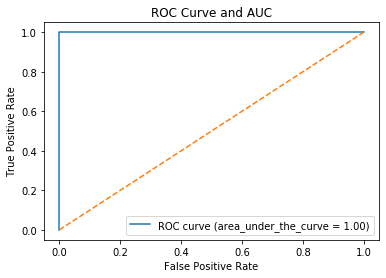

In [253]:
pr, tpr, _ = roc_curve(Test_Y,y_pred)
area_under_the_curve = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area_under_the_curve = %0.2f)' % area_under_the_curve)
plt.plot([0,1], [0,1], "--")
plt.title("ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

### (e) Binary Classification Using L1-penalized logistic regression (i)

In [254]:
from sklearn import preprocessing
def generate_features(bend_fil):
    files=[]
    splits1 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/train'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)


        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits1.append(features1)
    return splits1
bend_fil=["bending1","bending2"]
splits1 = generate_features(bend_fil)   #features of bending files

In [255]:
splits0 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits0 = generate_features(bend_fil) #features on non-bending files

In [256]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
for g in range(0,20):
    C_values=[]
    best_C_values=[]
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y = np.array([1]*len(splits1[g]) + [0]*len(splits0[g]))
    x=preprocessing.normalize(Train_X)

    logmodel=LogisticRegression(penalty='l1',solver='liblinear')
    C= np.logspace(0, 4, 10) #C is the regularization hyperparameter (10^-4 to 10^4)
    hyper_parameters = dict(C=C)
    gscv=GridSearchCV(logmodel, hyper_parameters, cv=5, verbose=0) #grid search using 5 fold cross validation
    grid_model=gscv.fit(x,Train_Y)
    best_C_values=grid_model.best_estimator_.get_params()['C']
    C_values.append(best_C_values)
    #     print('Best C for {}:'.format(g), C_values)
    logmodel2=LogisticRegression(penalty='l1',solver='liblinear',C=best_C_values)
    scores = cross_val_score(logmodel2, Train_X, Train_Y, cv=5)
    mean_scores=scores.mean()
    print("Mean cross validation scores for {}=".format(g),mean_scores)   

Mean cross validation scores for 0= 0.9714285714285715
Mean cross validation scores for 1= 0.9131868131868133
Mean cross validation scores for 2= 0.9131868131868133
Mean cross validation scores for 3= 0.9417582417582417
Mean cross validation scores for 4= 0.9131868131868133
Mean cross validation scores for 5= 0.9417582417582417
Mean cross validation scores for 6= 0.9560439560439562
Mean cross validation scores for 7= 0.9274725274725275
Mean cross validation scores for 8= 0.9274725274725275
Mean cross validation scores for 9= 0.9417582417582417
Mean cross validation scores for 10= 0.9560439560439562
Mean cross validation scores for 11= 0.9571428571428571
Mean cross validation scores for 12= 0.9417582417582417
Mean cross validation scores for 13= 0.9417582417582417
Mean cross validation scores for 14= 0.9417582417582417
Mean cross validation scores for 15= 0.9417582417582417
Mean cross validation scores for 16= 0.9274725274725275
Mean cross validation scores for 17= 0.9417582417582417
Me

The best values of the penaly are printed. The best split will be the one which has the highest value of C, i.e. 0.971 for split=1 (g value will be 1). Best value of pair (C,l) is (0.985,1)

GridSearchCV refrence from https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/

cross_val_score reference from https://scikit-learn.org/stable/modules/cross_validation.html

### (e) Binary Classification Using L1-penalized logistic regression (ii)

In [257]:
from sklearn import preprocessing
def generate_features(bend_fil):
    files=[]
    splits11 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/test'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)


        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits11.append(features1)
    return splits11
bend_fil=["bending1","bending2"]
splits11 = generate_features(bend_fil)   

In [258]:
splits00 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits00 = generate_features(bend_fil)

In [259]:
for g in range(0,1):
    best_C_values=[]
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y = np.array([1]*len(splits1[g]) + [0]*len(splits0[g]))
    Test_X = np.array(splits11[g] + splits00[g])
    Test_Y = np.array([1]*len(splits11[g]) + [0]*len(splits00[g]))
 
    logmodel2=LogisticRegression(penalty='l1',solver='liblinear',C=0.971).fit(Train_X,Train_Y)
    
    y_pred=logmodel2.predict(Test_X)
    print("Predicted=",y_pred)
    print("Äctual=",Test_Y)
    score=logmodel2.score(Test_X,Test_Y)
    print("Prediction Accuracy=",score)

Predicted= [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Äctual= [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediction Accuracy= 1.0


Confusion Matrix=
[[15  0]
 [ 0  4]]


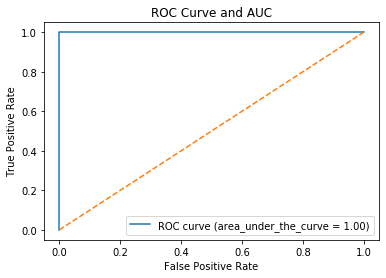

In [260]:
print("Confusion Matrix=")
print(confusion_matrix(Test_Y,y_pred))
pr, tpr, _ = roc_curve(Test_Y,y_pred)
area_under_the_curve = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area_under_the_curve = %0.2f)' % area_under_the_curve)
plt.plot([0,1], [0,1], "--")
plt.title("ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

L1-penalized logistic regression is easier and fast to implement than variable selection using p-values. 

According to the graphs and accuracy score(both have an accuracy score of 1), they both (L1-penalized with variable selection using p-values) perform well but looking at the ease of implementation. I would say that L1-penalized logistic regression performs better. 

Additonally, whenever the class imbalance is large usually the test error rate is high but because we have a small sample size here and the classes are linearly seperable the accuracy is very high. 

### (f) Multi-class Classification (The Realistic Case) (i)

In [261]:
from sklearn import preprocessing
def generate_features(bend_fil):
    files=[]
    splits1 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/train'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)


        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits1.append(features1)
    return splits1
bend_fil=["bending1","bending2"]
splits1 = generate_features(bend_fil)   #features of bending files

In [262]:
splits0 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits0 = generate_features(bend_fil) #features on non-bending files

In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
for g in range(0,20):
    best_C_values=[]
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y = np.array([0]*5 + [1]*4 + [2]*12 + [3]*12 + [4]*12 + [5]*12 +[6]*12)
    x=preprocessing.normalize(Train_X)
    logmodel=LogisticRegression(multi_class='multinomial',penalty='l1',solver='saga') # l1 penalty with SAGA solver (allowing ‘multinomial’ + L1)
    C= np.logspace(0, 4, 10) 
    hyper_parameters = dict(C=C)
    gscv=GridSearchCV(logmodel, hyper_parameters, cv=5, verbose=0) 
    best_C_values=grid_model.best_estimator_.get_params()['C']
    
    logmodel2=LogisticRegression(penalty='l1',solver='liblinear',C=best_C_values)
    scores = cross_val_score(logmodel2, x, Train_Y, cv=5)
    mean_scores=scores.mean()
    print("Mean cross validation scores for {}=".format(g),mean_scores)   

Mean cross validation scores for 0= 0.8631907308377895
Mean cross validation scores for 1= 0.7131016042780749
Mean cross validation scores for 2= 0.7111408199643494
Mean cross validation scores for 3= 0.7979500891265597
Mean cross validation scores for 4= 0.7459893048128342
Mean cross validation scores for 5= 0.700891265597148
Mean cross validation scores for 6= 0.7106951871657754
Mean cross validation scores for 7= 0.7126559714795009
Mean cross validation scores for 8= 0.7106951871657754
Mean cross validation scores for 9= 0.739126559714795
Mean cross validation scores for 10= 0.6724598930481284
Mean cross validation scores for 11= 0.6940285204991088
Mean cross validation scores for 12= 0.6989304812834225
Mean cross validation scores for 13= 0.623885918003565
Mean cross validation scores for 14= 0.6655971479500892
Mean cross validation scores for 15= 0.6822638146167559
Mean cross validation scores for 16= 0.6758467023172905
Mean cross validation scores for 17= 0.7220142602495544
Mean 

The best value will be the one which has the highest mean cross validation score which is 0.863 for the split l=1 (value of g will be 0)

In [264]:
from sklearn import preprocessing
def generate_features(bend_fil):
    files=[]
    splits11 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/test'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)


        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits11.append(features1)
    return splits11
bend_fil=["bending1","bending2"]
splits11 = generate_features(bend_fil)  

In [265]:
splits00 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits00 = generate_features(bend_fil) #features on non-bending files

In [266]:
from sklearn import metrics
for g in range(0,1):
    best_C_values=[]
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y = np.array([0]*5 + [1]*4 + [2]*12 + [3]*12 + [4]*12 + [5]*12 +[6]*12)
    Test_X = np.array(splits11[g] + splits00[g])
    Test_Y = np.array([0]*2 + [1]*2 + [2]*3 + [3]*3 + [4]*3 + [5]*3 +[6]*3)

    logmodel2=LogisticRegression(multi_class='multinomial',penalty='l1',solver='saga',C=0.863).fit(Train_X,Train_Y)
    
    y_pred=logmodel2.predict(Test_X)
    print("Predicted=",y_pred)
    print("Äctual=",Test_Y)
    score=logmodel2.score(Test_X,Test_Y)
    print("Prediction Accuracy on Test Data=",score)
    cm = metrics.confusion_matrix(Test_Y, y_pred)
    print("Confusion Matrix=",cm)
    test_error=1-score
    print("Test Error=",test_error)

Predicted= [0 0 1 2 2 2 2 3 3 3 4 4 4 3 5 5 6 6 6]
Äctual= [0 0 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
Prediction Accuracy on Test Data= 0.8947368421052632
Confusion Matrix= [[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]
Test Error= 0.10526315789473684


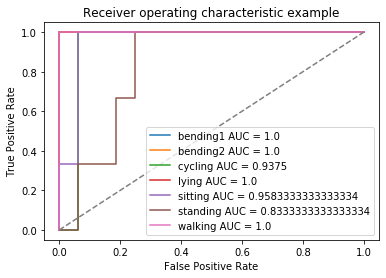

In [267]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
y = label_binarize(Train_Y, classes=[0,1,2,3,4,5,6])
n_classes = 7
clf = OneVsRestClassifier(LogisticRegression(multi_class='multinomial',penalty='l1',solver='saga',C=0.863))
y_score = clf.fit(Train_X, Train_Y).decision_function(Test_X)
multiclass_classes=['bending1','bending2','cycling','lying','sitting','standing','walking']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test=label_binarize(Test_Y, classes=[0,1,2,3,4,5,6])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Plot of a ROC curve for a specific class
    labels = str(multiclass_classes[i]) + " AUC = " + str(roc_auc[i])
    plt.plot(fpr[i], tpr[i],label=labels)

plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    

All the classes are not visible because bending1, bending2, lying, and walking have the same AUC, i.e. they have the same line in the plot.

multiclass roc curve reference from https://stackoverflow.com/questions/45332410/sklearn-roc-for-multiclass-classification

### (f) Multi-class Classification (The Realistic Case) (ii) - Gaussian Naive Bayes

In [268]:
from sklearn import preprocessing
def generate_features(bend_fil):
    files=[]
    splits1 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/train'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)


        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits1.append(features1)
    return splits1
bend_fil=["bending1","bending2"]
splits1 = generate_features(bend_fil)

In [269]:
splits0 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits0 = generate_features(bend_fil) 

In [270]:
from sklearn.naive_bayes import GaussianNB
for g in range(0,20):
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y = np.array([0]*5 + [1]*4 + [2]*12 + [3]*12 + [4]*12 + [5]*12 +[6]*12)
#     x=preprocessing.normalize(Train_X)
    gaussian_model=GaussianNB()
    gaussian_model.fit(Train_X,Train_Y)
    scores=cross_val_score(gaussian_model,Train_X,Train_Y,cv=5)
    mean_scores=scores.mean()
    print("Mean cross validation scores for {}=".format(g),mean_scores)

Mean cross validation scores for 0= 0.8169340463458111
Mean cross validation scores for 1= 0.846078431372549
Mean cross validation scores for 2= 0.7410873440285205
Mean cross validation scores for 3= 0.6679144385026737
Mean cross validation scores for 4= 0.6140819964349375
Mean cross validation scores for 5= 0.6527629233511586
Mean cross validation scores for 6= 0.6758467023172905
Mean cross validation scores for 7= 0.7209447415329768
Mean cross validation scores for 8= 0.6228163992869875
Mean cross validation scores for 9= 0.6493761140819965
Mean cross validation scores for 10= 0.6591800356506239
Mean cross validation scores for 11= 0.6076648841354724
Mean cross validation scores for 12= 0.6307486631016042
Mean cross validation scores for 13= 0.5488413547237077
Mean cross validation scores for 14= 0.5959001782531195
Mean cross validation scores for 15= 0.5959001782531195
Mean cross validation scores for 16= 0.5992869875222816
Mean cross validation scores for 17= 0.5424242424242425
Mea

The best split is the one which has the highest value of Mean cross validation score which is 0.846 for split l=2 (value of g will be 1)

In [271]:
from sklearn import preprocessing
def generate_features(bend_fil):
    files=[]
    splits11 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/test'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)


        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits11.append(features1)
    return splits11
bend_fil=["bending1","bending2"]
splits11 = generate_features(bend_fil)  

In [272]:
splits00 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits00 = generate_features(bend_fil) #features on non-bending files

In [273]:
from sklearn import metrics
for g in range(1,2):
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y = np.array([0]*5 + [1]*4 + [2]*12 + [3]*12 + [4]*12 + [5]*12 +[6]*12)
    Test_X = np.array(splits11[g] + splits00[g])
    Test_Y = np.array([0]*2 + [1]*2 + [2]*3 + [3]*3 + [4]*3 + [5]*3 +[6]*3)

    gaussian_model=GaussianNB()
    gaussian_model.fit(Train_X,Train_Y)
    y_pred=gaussian_model.predict(Test_X)
    print("Predicted=",y_pred)
    print("Äctual=",Test_Y)
    score=gaussian_model.score(Test_X,Test_Y)
    print("Prediction Accuracy on Test Data=",score)
    cm = metrics.confusion_matrix(Test_Y, y_pred)
    print("Confusion Matrix=",cm)
    test_error=1-score
    print("Test Error=",test_error)

Predicted= [3 3 3 4 2 2 2 3 3 3 5 4 3 4 5 5 6 6 6]
Äctual= [0 0 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
Prediction Accuracy on Test Data= 0.631578947368421
Confusion Matrix= [[0 0 0 2 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]
Test Error= 0.368421052631579


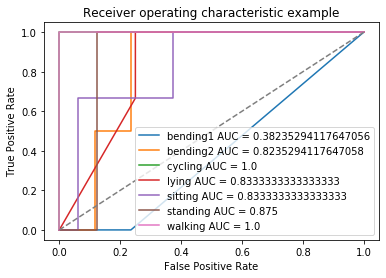

In [274]:
y = label_binarize(Train_Y, classes=[0,1,2,3,4,5,6])
n_classes = 7
clf = OneVsRestClassifier(GaussianNB())
y_score = clf.fit(Train_X, Train_Y).predict_proba(Test_X)
multiclass_classes=['bending1','bending2','cycling','lying','sitting','standing','walking']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test=label_binarize(Test_Y, classes=[0,1,2,3,4,5,6])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Plot of a ROC curve for a specific class
    labels = str(multiclass_classes[i]) + " AUC = " + str(roc_auc[i])
    plt.plot(fpr[i], tpr[i],label=labels)

plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    

### (f) Multi-class Classification (The Realistic Case) (ii) - Multinomial Naive Bayes

In [275]:
from sklearn import preprocessing
def generate_features(bend_fil):
    files=[]
    splits1 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/train'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)


        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits1.append(features1)
    return splits1
bend_fil=["bending1","bending2"]
splits1 = generate_features(bend_fil)

In [276]:
splits0 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits0 = generate_features(bend_fil) 

In [277]:
from sklearn.naive_bayes import MultinomialNB
for g in range(0,20):
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y = np.array([0]*5 + [1]*4 + [2]*12 + [3]*12 + [4]*12 + [5]*12 +[6]*12)
    multinomial_model=MultinomialNB()
    multinomial_model.fit(Train_X,Train_Y)
    scores=cross_val_score(multinomial_model,Train_X,Train_Y,cv=5)
    mean_scores=scores.mean()
    print("Mean cross validation scores for {}=".format(g),mean_scores)

Mean cross validation scores for 0= 0.8381461675579323
Mean cross validation scores for 1= 0.8278966131907308
Mean cross validation scores for 2= 0.8146167557932262
Mean cross validation scores for 3= 0.8563279857397503
Mean cross validation scores for 4= 0.8381461675579323
Mean cross validation scores for 5= 0.8263814616755794
Mean cross validation scores for 6= 0.8263814616755794
Mean cross validation scores for 7= 0.8263814616755794
Mean cross validation scores for 8= 0.8028520499108736
Mean cross validation scores for 9= 0.8028520499108736
Mean cross validation scores for 10= 0.8327985739750445
Mean cross validation scores for 11= 0.8028520499108736
Mean cross validation scores for 12= 0.8028520499108736
Mean cross validation scores for 13= 0.7846702317290554
Mean cross validation scores for 14= 0.7979500891265597
Mean cross validation scores for 15= 0.7861853832442068
Mean cross validation scores for 16= 0.7979500891265597
Mean cross validation scores for 17= 0.8043672014260249
Me

The best split is the one with the highest values of the Mean corss validation score which is 0.856 for the split l=4 (value of g will be 3)

Also, I am not normalizing the training data as it is giving worse cross validation scores.

In [278]:
from sklearn import preprocessing
def generate_features(bend_fil):
    files=[]
    splits11 = []
    for b in bend_fil:
        path='C:/Users/Pratishtha Singh/Anaconda3/Notebooks/AReM/{}/test'.format(b)
        for dir1 in os.listdir(path):
            files.append(path + '/' + dir1)
    for l in range(1,21):
        lth_splits=[]
        for f in files:
            df_full = pd.DataFrame()
            df=pd.read_csv(f,usecols=col)
            df_part = np.array_split(df, l)
            for i in range(len(df_part)):
                df_part[i].rename(columns={"avg_rss12": "avg_rss12-part" + str(i), "var_rss12": "var_rss12-part"+ str(i),"avg_rss13" : "avg_rss13-part"+ str(i),"var_rss13" : "var_rss13-part"+ str(i),"avg_rss23":"avg_rss23-part"+ str(i),"var_rss23":"var_rss23-part"+ str(i)},inplace=True)
                df_part[i].reset_index(drop=True, inplace=True)
                df_full=pd.concat([df_full,df_part[i]],axis=1)
            lth_splits.append(df_full)


        features1 = []
        for lth_split_for_file_f in lth_splits:
            mean = lth_split_for_file_f.mean().tolist()
            median = lth_split_for_file_f.median().tolist()
            std = lth_split_for_file_f.std().tolist()
            minimum=lth_split_for_file_f.min().tolist()
            maximum=lth_split_for_file_f.max().tolist()
            q1=lth_split_for_file_f.quantile(0.25).tolist()
            q2=lth_split_for_file_f.quantile(0.75).tolist()

            feature_f = np.array(minimum + maximum + mean + median + std + q1 + q2)
            features1.append(feature_f)
        splits11.append(features1)
    return splits11
bend_fil=["bending1","bending2"]
splits11 = generate_features(bend_fil)  

In [279]:
splits00 = []
files=[]
bend_fil=["cycling","lying","sitting","standing","walking"]
splits00 = generate_features(bend_fil) #features on non-bending files

In [280]:
from sklearn import metrics
for g in range(3,4):
    Train_X = np.array(splits1[g] + splits0[g])
    Train_Y = np.array([0]*5 + [1]*4 + [2]*12 + [3]*12 + [4]*12 + [5]*12 +[6]*12)
    Test_X = np.array(splits11[g] + splits00[g])
    Test_Y = np.array([0]*2 + [1]*2 + [2]*3 + [3]*3 + [4]*3 + [5]*3 +[6]*3)

    multinomial_model=MultinomialNB()
    multinomial_model.fit(Train_X,Train_Y)
    y_pred=multinomial_model.predict(Test_X)
    print("Predicted=",y_pred)
    print("Äctual=",Test_Y)
    score=multinomial_model.score(Test_X,Test_Y)
    print("Prediction Accuracy on Test Data=",score)
    cm = metrics.confusion_matrix(Test_Y, y_pred)
    print("Confusion Matrix=",cm)
    test_error=1-score
    print("Test Error=",test_error)

Predicted= [0 0 0 1 2 2 2 3 3 3 5 4 4 4 4 5 6 6 6]
Äctual= [0 0 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
Prediction Accuracy on Test Data= 0.7894736842105263
Confusion Matrix= [[2 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 0 3]]
Test Error= 0.21052631578947367


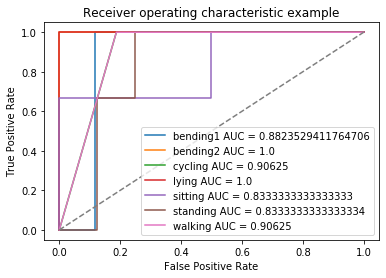

In [281]:
y = label_binarize(Train_Y, classes=[0,1,2,3,4,5,6])
n_classes = 7
clf = OneVsRestClassifier(MultinomialNB())
y_score = clf.fit(Train_X, Train_Y).predict_proba(Test_X)
multiclass_classes=['bending1','bending2','cycling','lying','sitting','standing','walking']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test=label_binarize(Test_Y, classes=[0,1,2,3,4,5,6])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Plot of a ROC curve for a specific class
    labels = str(multiclass_classes[i]) + " AUC = " + str(roc_auc[i])
    plt.plot(fpr[i], tpr[i],label=labels)

plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    

### Results:

1. L1-penalized multinomial regression model:

Prediction Accuracy on Test Data= 0.895

Test Error= 0.105
2. Gaussian Naive Bayes Classifier:

Prediction Accuracy on Test Data= 0.632

Test Error= 0.368
3. Multinomial Naive Bayes Classifier:

Prediction Accuracy on Test Data= 0.789

Test Error= 0.211

In this case, L1-penalized multinomial regression model works better than the Gaussian Naive Bayes and Multinomial Naive Bayes as it has the maximum test accuracy out of the three models.

Mutinomial Naive Bayes works better than the Gaussain Naive Bayes Classifier as it has lesser test error.

### (f) Multi-class Classification (The Realistic Case) (iii)

Looking at the results I would say that for multi class classification L1-penalized multinomial regression is the best method. It has the highest accuracy and the least test errors. 

I have preferred Multinomial Naive Bayes over Gaussian Naive Bayes it has higher accuracy than Multinomial Naive Bayes.  

### ISLR 3.7.4

(a) Cubic regression model would overfit more closeley to the training data. Therefore, have lesser RSS compared to the RSS of the linear regression model even when the true relationship between X and Y is linear. 

(b) The linear regression model would give less test RSS compared to the cubic regression model test RSS as the cubic model will be more over fitted and could lead to worse test RSS values.

(c)The cubic regression will fit better if the true relationship between X and Y is non-linear. Hence, it will have lesser train RSS compared to the linear regression model train RSS.

(d) Since the true model is non-linear, the test RSS should be less in the case of cubic regression as it would fit better towards non-linearity. 

ISLR 4.7.3 and ISLR 4.7.7 are attached in the folder